In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [2]:
df_1 = pd.read_csv('lab1_pt1.csv', delimiter=';')
df_1.head()

,d_alpha,I
0,86,2.36
1,81,4.88
2,76,12.22
3,71,26.74
4,66,44.10


In [3]:
def malus(x, I_max):
    return I_max * np.cos(x / 180 * np.pi) ** 2
x_assist = np.linspace(0, 90, int(1e3))

In [4]:
fit_params = curve_fit(malus, df_1['d_alpha'].values, df_1['I'].values)
fit_params

(array([346.9199029]), array([[19.33969206]]))

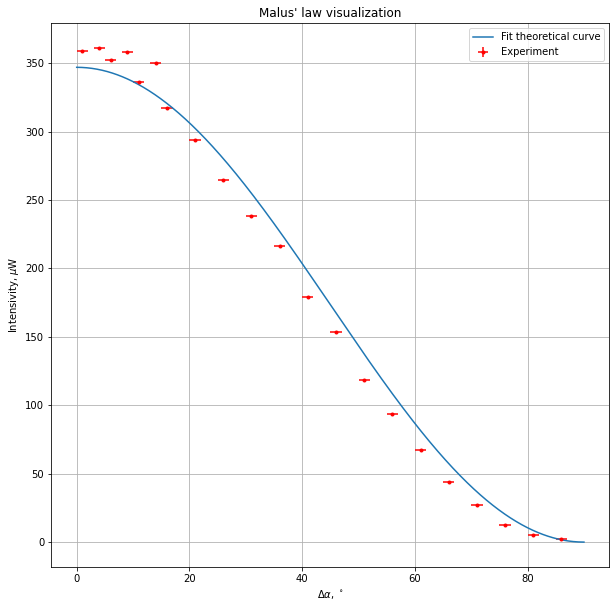

In [5]:
plt.figure(figsize=(10, 10))

plt.errorbar(df_1['d_alpha'].values, df_1['I'].values, yerr=0.1, xerr=1, label='Experiment', fmt='.r')
plt.plot(x_assist, malus(x_assist, fit_params[0]), label='Fit theoretical curve')

plt.title('Malus\' law visualization')
plt.xlabel('$\Delta\\alpha$, $^\circ$')
plt.ylabel('Intensivity, $\mu$W')

plt.grid()
plt.legend()
plt.savefig('lab_1.pdf')
plt.show()

In [6]:
df_2 = pd.read_csv('lab1_pt2.csv', delimiter=';')
df_2

,alpha,I_s,I_p
0,20,27.57,12.76
1,30,33.00,10.47
2,40,42.00,7.09
3,50,58.00,3.19
4,55,69.80,1.44
5,57,77.20,0.94
6,59,82.50,0.61
7,60,85.60,0.54
8,61,92.20,0.56
9,63,101.80,0.83


In [7]:
def cos_gammma(a, n1, n2):
    return np.sqrt(1 - (n1 / n2) ** 2 * np.sin(a) ** 2)
def Rs(a, n1, n2):
    return ((n1 * np.cos(a) - n2 * cos_gammma(a, n1, n2)) / (n1 * np.cos(a) + n2 * cos_gammma(a, n1, n2))) ** 2
def Rp(a, n1, n2):
    return ((n1 * cos_gammma(a, n1, n2) - n2 * np.cos(a)) / (n1 * cos_gammma(a, n1, n2) + n2 * np.cos(a))) ** 2

fit_params_s = curve_fit(, df_2['alpha'].values, df_2['I_s'].values)
fit_params_s

In [8]:
x_assist_2 = np.linspace(10, 90, int(1e3))

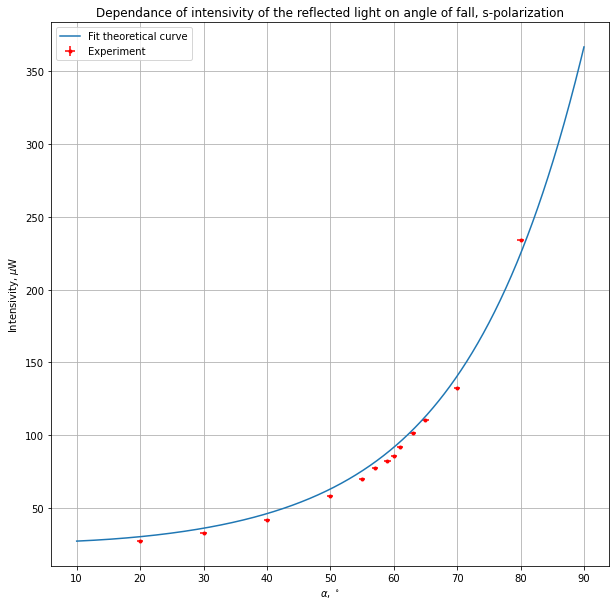

In [9]:
plt.figure(figsize=(10, 10))

plt.errorbar(df_2['alpha'].values, df_2['I_s'].values, yerr=0.1, xerr=0.5, fmt='.r', label='Experiment')
plt.plot(x_assist_2, Rs(x_assist_2 * np.pi / 180, 1, 1.732) * 220 / 0.6, label='Fit theoretical curve')  # Curve is to be fit in a normal way lmao
plt.grid()
plt.title('Dependance of intensivity of the reflected light on angle of fall, s-polarization')
plt.xlabel('$\\alpha$, $^\circ$')
plt.ylabel('Intensivity, $\mu$W')
plt.legend()

plt.savefig('lab_2_1.pdf')
plt.show()

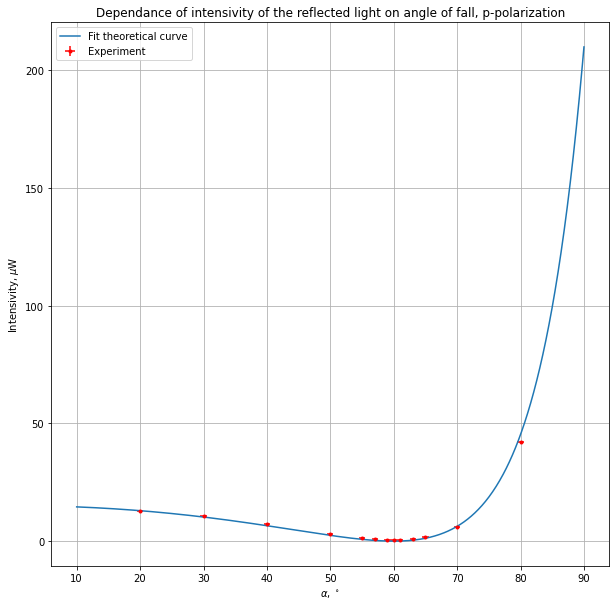

In [10]:
plt.figure(figsize=(10, 10))

plt.errorbar(df_2['alpha'].values, df_2['I_p'].values, yerr=0.1, xerr=0.5, fmt='.r', label='Experiment')
plt.plot(x_assist_2, Rp(x_assist_2 * np.pi / 180, 1, 1.732) * 42 / 0.2, label='Fit theoretical curve')
plt.grid()
plt.title('Dependance of intensivity of the reflected light on angle of fall, p-polarization')
plt.xlabel('$\\alpha$, $^\circ$')
plt.ylabel('Intensivity, $\mu$W')
plt.legend()

plt.savefig('lab_2_2.pdf')
plt.show()

 Угол Брюстера $\theta_B \approx 60^\circ$, значит:

In [21]:
n_2 = np.tan(60 * np.pi / 180) * 1
n_2

1.7320508075688767